In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

import numpyro
NDEVICES=2
numpyro.set_host_device_count(NDEVICES)

from scenario_generator import mcmc_forecast

In [3]:
with open('nan_rb_onboard.pkl', 'rb') as f:
    debug_data = pickle.load(f)

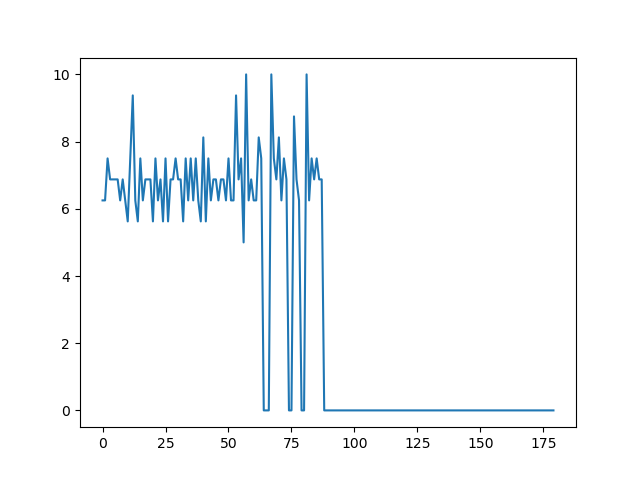

In [11]:
y_train = debug_data['y_train']
y_scale = debug_data['y_scale']
forecast_length = debug_data['forecast_length']
num_warmup_mcmc = debug_data['num_warmup_mcmc']
num_samples_mcmc = debug_data['num_samples_mcmc']
seasonality_mcmc = debug_data['seasonality_mcmc']
num_chains_mcmc = debug_data['num_chains_mcmc']

assert len(np.where(np.isnan(y_train))[0]) == 0

y = jnp.array(y_train) / y_scale

plt.figure()
plt.plot(y)

In [13]:
y_pred = mcmc_forecast.mcmc_predict(y, forecast_length,
                                    num_warmup_mcmc=num_warmup_mcmc, 
                                    num_samples_mcmc=num_samples_mcmc,
                                    seasonality_mcmc=seasonality_mcmc, 
                                    num_chains_mcmc=num_chains_mcmc)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
      coef_trend     -0.64      0.65     -0.64     -1.29      0.01       nan       inf
       init_s[0]      0.76      1.06      0.76     -0.30      1.83      1.00 279219.16
       init_s[1]      0.34      0.30      0.34      0.04      0.64      1.00 452200.78
       init_s[2]      0.97      0.99      0.97     -0.02      1.96       nan 300965.41
       init_s[3]     -0.78      1.18     -0.78     -1.96      0.39      1.00 449563.12
       init_s[4]     -1.72      0.05     -1.72     -1.78     -1.67      1.00  17262.31
       init_s[5]      0.33      0.40      0.33     -0.07      0.73      1.00 698899.44
       init_s[6]      0.22      1.49      0.22     -1.27      1.71      1.00 704760.31
       init_s[7]     -1.32      0.13     -1.32     -1.45     -1.20      1.00 218257.86
       init_s[8]     -1.29      0.62     -1.29     -1.91     -0.67      1.00 160868.55
       init_s[9]     -1.83      0.00     -

In [14]:
np.isnan(y_pred).any()

True